#<center>**Transformada de Fourier para Detecção de Comandos de Voz**</center>

<b>Autora:</b> Maria Eline Silva de Farias- 516229

<b>Resumo:</b>
 Determinar a eficiência de diferentes domínios (tempo, Transformada de Fourier - TF e Transformada de Fourier de Tempo Curto - STFT) na detecção de comandos de voz "sim" e "não".

1. Carregar e Visualizar os Áudios de Treinamento:
* Carregar os 10 sinais de áudio (5 "sim" e 5 "não").
* Gerar gráficos para visualizar os áudios "sim" e "não".

2. Calcular Energia no Domínio do Tempo:

* Dividir cada sinal em 80 blocos de N/80 amostras.
* Calcular a energia de cada bloco.
* Gerar gráficos com as energias dos blocos.
* Calcular a Transformada de Fourier (TF):

3. Calcular a TF dos 10 sinais de áudio.
* Gerar gráficos das TFs.
* Eliminar Redundâncias na TF:

4. Descartar frequências negativas e acima de pi/2.
* Gerar gráficos das TFs após o filtro.
* Calcular Energia na TF:

5. Dividir cada TF em 80 blocos de N/320 amostras.
* Calcular a energia de cada bloco.
* Gerar gráficos com as energias dos blocos.

6. Calcular a STFT:
* Dividir cada sinal de áudio em 10 blocos de N/10 amostras.
* Calcular a STFT de cada bloco.
* Gerar gráficos das STFTs.

7. Calcular Energia na STFT:
* Dividir cada STFT em 8 blocos de N/320 amostras.
* Calcular a energia de cada bloco (totalizando 80 energias por áudio).

8. Calcular Centroides:
* Organizar as 80 energias em um vetor e calcular a média para as classes "sim e "não" em cada domínio.
* Obter os centroides (2 vetores de tamanho 80x1) para cada domínio.

9. Repetir os Passos 1 a 7 para os Áudios de Teste:
* Calcular energias para os 7 sinais de teste em cada domínio.

10. Detecção usando Algoritmo do Centroide:
* Calcular a distância Euclidiana entre os vetores de teste e os centroides.
* Classificar os sinais de teste com base nas distâncias calculadas.
* Avaliar o desempenho (número de acertos) para cada domínio.

<b>Descrição:</b>

Este projeto é realizado para  a disciplina Processamento Digital de Sinais(PDS).

##Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from cycler import cycler
from scipy.stats.mstats import gmean,hmean
from scipy import stats
from scipy.fft import fft
import math
from scipy.stats import kurtosis, skew
import scipy as sp
from scipy import signal
from scipy.fft import fft, fftfreq
from random import seed
from random import randrange
from csv import reader
from math import sqrt
import csv
import math
import plotly.express as px
import librosa.display
import librosa
%matplotlib inline
from scipy.signal import stft
from scipy.spatial.distance import euclidean

##Carregando as Bases de Dados

In [2]:
# carregando dataset InputDataTrain
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/trabalho01/dados/InputDataTrain.csv",header=None)

# carregando dataset InputDataTest
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/trabalho01/dados/InputDataTest.csv",header=None)

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58360 entries, 0 to 58359
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       58360 non-null  float64
 1   1       58360 non-null  float64
 2   2       58360 non-null  float64
 3   3       58360 non-null  float64
 4   4       58360 non-null  float64
 5   5       58360 non-null  float64
 6   6       58360 non-null  float64
 7   7       58360 non-null  float64
 8   8       58360 non-null  float64
 9   9       58360 non-null  float64
dtypes: float64(10)
memory usage: 4.5 MB


In [4]:
df_train.sample(5)

,0,1,2,3,4,5,6,7,8,9
1986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
23903,0.012421,0.036316,-0.007690,-0.001312,0.014374,-0.014709,0.006226,0.021240,-0.013977,-0.004456
51733,-0.001465,-0.001282,-0.002991,-0.008911,-0.004517,-0.000336,-0.005463,0.003449,0.000824,-0.101320
10402,0.002197,0.006867,0.000000,0.000000,0.000000,0.000000,-0.000641,-0.000977,0.000000,-0.000305
22106,0.041718,-0.064392,-0.001343,0.001892,-0.132080,-0.020325,0.007385,-0.003021,-0.330260,0.003296


In [5]:
df_test.sample(5)

,0,1,2,3,4,5,6
1639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25210,0.029877,0.122160,-0.024811,-0.050598,0.019135,-0.010498,0.025024
41509,0.017609,0.011658,-0.022461,-0.123380,-0.019318,0.114750,-0.001556
6025,0.000000,0.000000,-0.002380,0.000000,0.000000,-0.003387,0.000000
41152,-0.092377,0.037048,-0.033417,-0.034973,0.151370,-0.189360,-0.007385


##1- Carregue os 10 sinais de áudio de InputDataTrain.m e gere os gráficos destes sinais, em 2 figuras separadas. Uma figura deve conter os áudios “sim” e a outra deve conter os áudios “não”

In [6]:
#separando os áudios "sim" e "não"
audio_nao = df_train.iloc[:,:5]
audio_sim = df_train.iloc[:,5:]

In [7]:
print(audio_nao)

              0         1         2         3         4
0      0.000000  0.000000  0.000000  0.000000  0.000000
1      0.000000  0.000000  0.000000  0.000000  0.000000
2      0.000000  0.000000  0.000000  0.000000  0.000000
3      0.000000  0.000000  0.000000  0.000000  0.000000
4      0.000000  0.000000  0.000000  0.000000  0.000000
...         ...       ...       ...       ...       ...
58355  0.002594 -0.002838 -0.009399  0.005524  0.003143
58356  0.002747 -0.002563 -0.009491  0.005859  0.002533
58357  0.002747 -0.002167 -0.009399  0.006165  0.001984
58358  0.002625 -0.001679 -0.009064  0.006317  0.001526
58359  0.002350 -0.001129 -0.008514  0.006287  0.001129

[58360 rows x 5 columns]


In [8]:
print(audio_sim)

              5         6         7         8         9
0      0.000000  0.000000  0.000000  0.000000  0.000000
1      0.000000  0.000000  0.000000  0.000000  0.000000
2      0.000000  0.000000  0.000000  0.000000  0.000000
3      0.000000  0.000000  0.000000  0.000000  0.000000
4      0.000000  0.000000  0.000000  0.000000  0.000000
...         ...       ...       ...       ...       ...
58355  0.003174  0.003815 -0.009735 -0.003021 -0.004059
58356  0.002441  0.003876 -0.009552 -0.003784 -0.004028
58357  0.001739  0.003967 -0.009369 -0.004578 -0.003937
58358  0.001251  0.004089 -0.009186 -0.005280 -0.003754
58359  0.001007  0.004211 -0.008911 -0.005798 -0.003387

[58360 rows x 5 columns]


### **Gráficos de cada uma das duas classes**

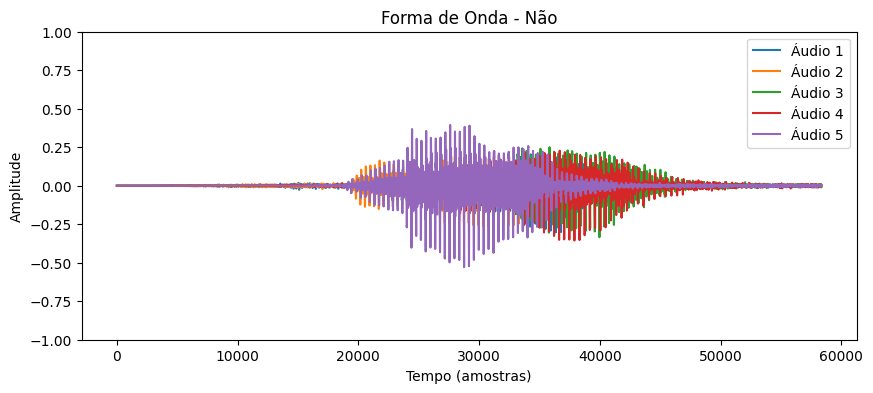

In [9]:
import matplotlib.pyplot as plt

# Inicializa uma figura
plt.figure(figsize=(10, 4))

# Itera sobre as colunas de 'audio_nao'
for i, coluna in enumerate(audio_nao.columns):
    audio_data = audio_nao[coluna]  # Obtendo os dados de áudio
    plt.plot(audio_data, label=f'Áudio {i+1}')  # Plota o áudio e adiciona uma etiqueta (label)

# Adiciona legendas aos eixos
plt.xlabel('Tempo (amostras)')
plt.ylabel('Amplitude')

# Adiciona uma legenda indicando qual áudio corresponde a cada linha
plt.legend()

# Define os limites y
plt.ylim([-1, 1])

# Exibe o gráfico
plt.title('Forma de Onda - Não')
plt.show()


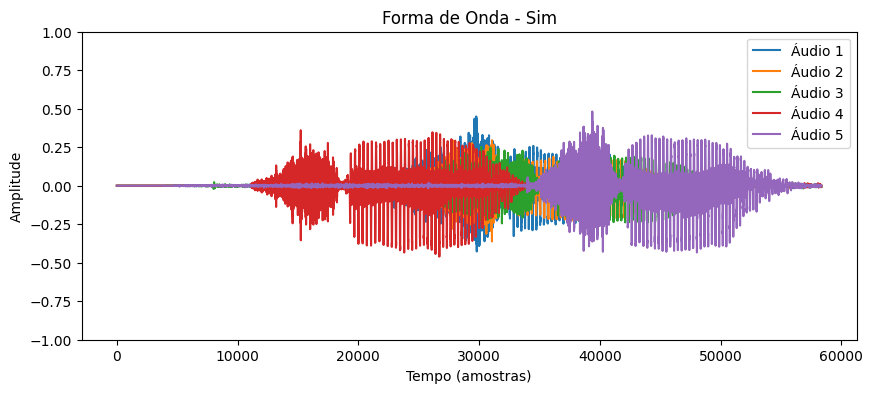

In [10]:
import matplotlib.pyplot as plt

# Inicializa uma figura
plt.figure(figsize=(10, 4))

# Itera sobre as colunas de 'audio_sim'
for i, coluna in enumerate(audio_sim.columns):
    audio_data = audio_sim[coluna]  # Obtendo os dados de áudio
    plt.plot(audio_data, label=f'Áudio {i+1}')  # Plota o áudio e adiciona uma etiqueta (label)

# Adiciona legendas aos eixos
plt.xlabel('Tempo (amostras)')
plt.ylabel('Amplitude')

# Adiciona uma legenda indicando qual áudio corresponde a cada linha
plt.legend()

# Define os limites y
plt.ylim([-1, 1])

# Exibe o gráfico
plt.title('Forma de Onda - Sim')
plt.show()


### **Gráficos de cada um dos 5 áudios da palavra "não"**

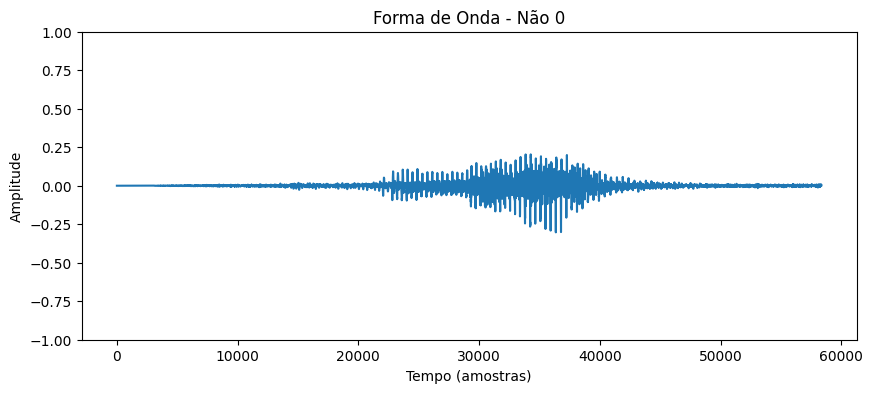

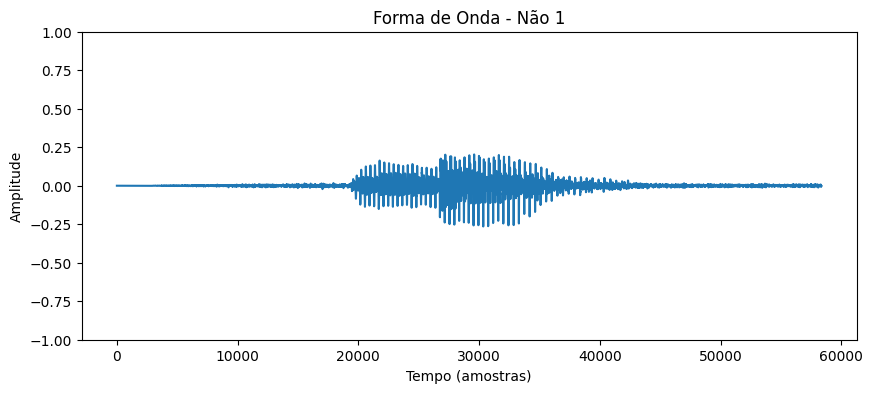

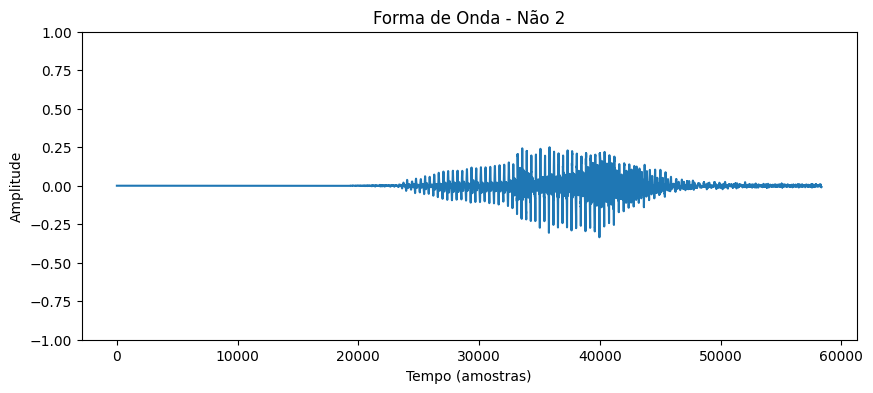

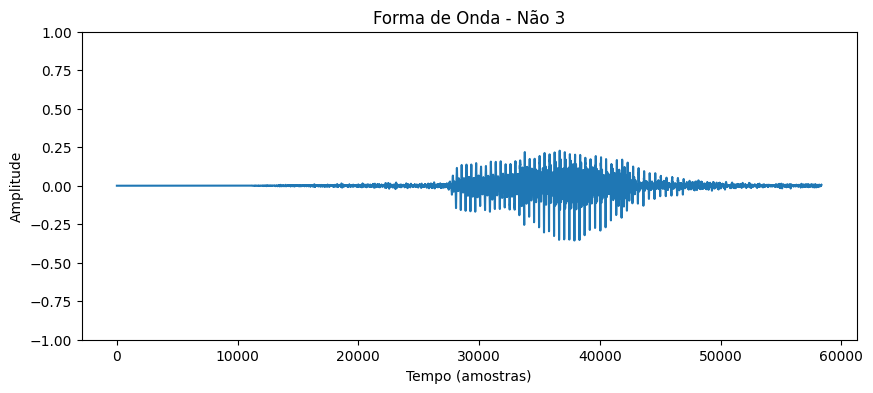

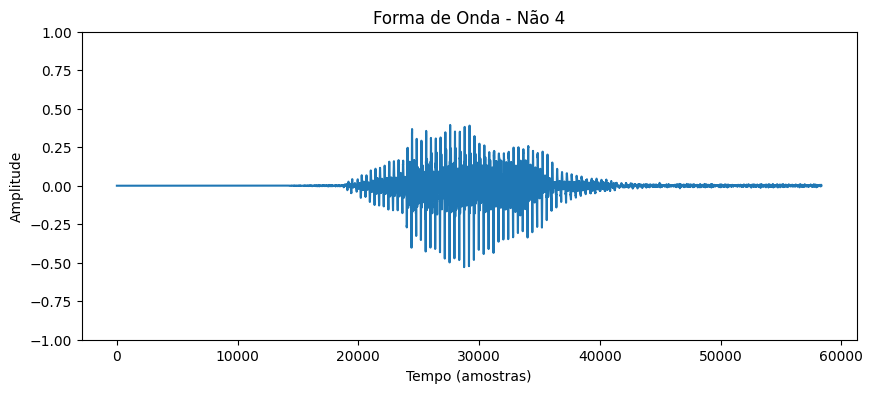

In [11]:
# Iterar sobre as colunas de 'audio_nao'
for coluna in audio_nao.columns:
    audio_data = audio_nao[coluna]  # Obtendo os dados de áudio
    plt.figure(figsize=(10, 4))
    plt.plot(audio_data)
    plt.title(f'Forma de Onda - Não {coluna}')
    plt.ylim([-1, 1])
    plt.xlabel('Tempo (amostras)')  # Adiciona legenda ao eixo x
    plt.ylabel('Amplitude')  # Adiciona legenda ao eixo y
    plt.show()


### **Gráficos de cada um dos 5 áudios da palavra "sim"**

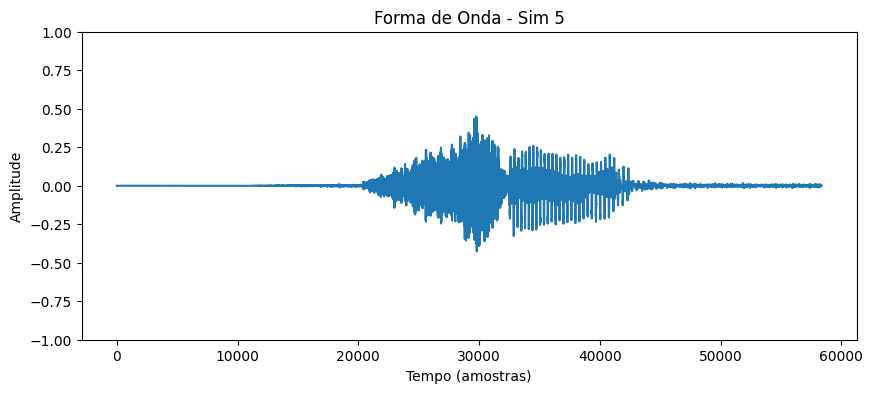

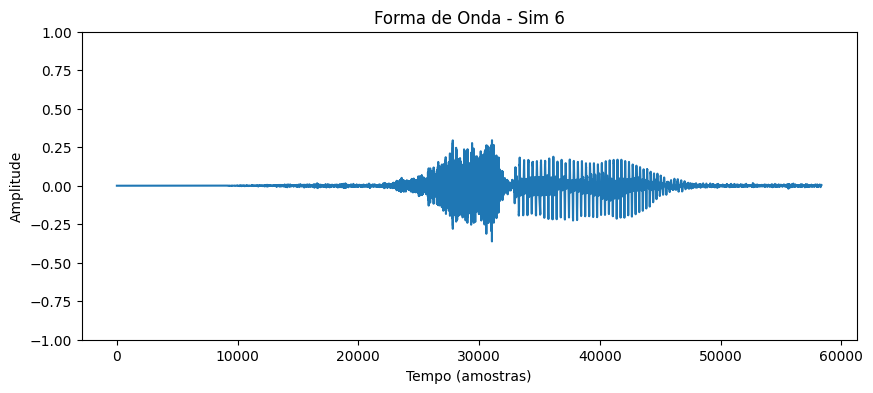

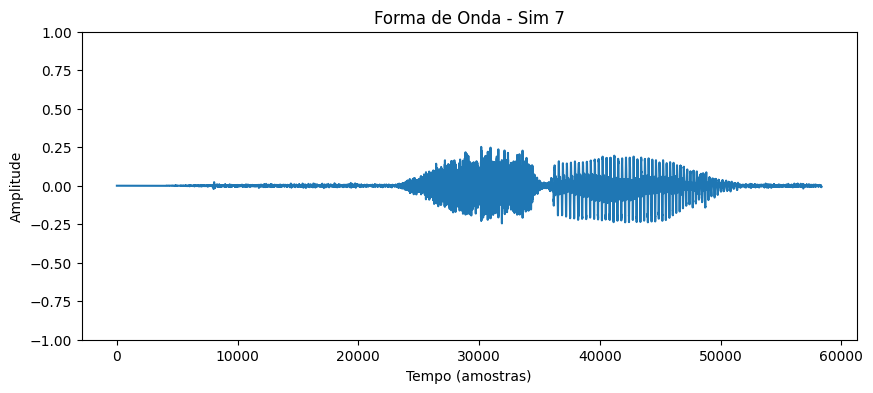

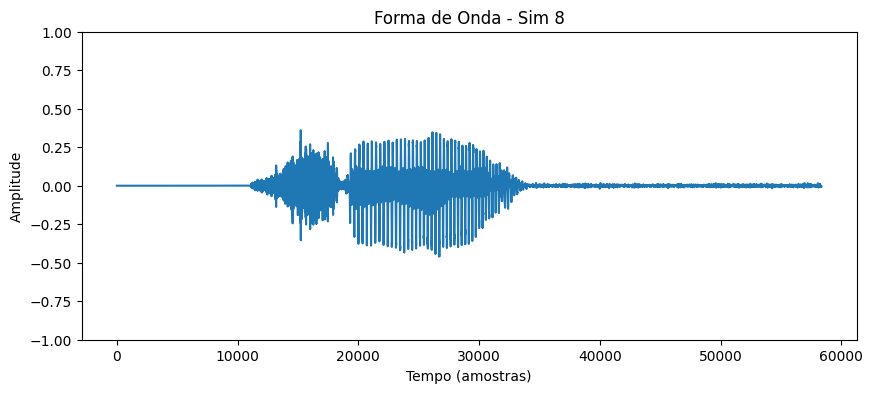

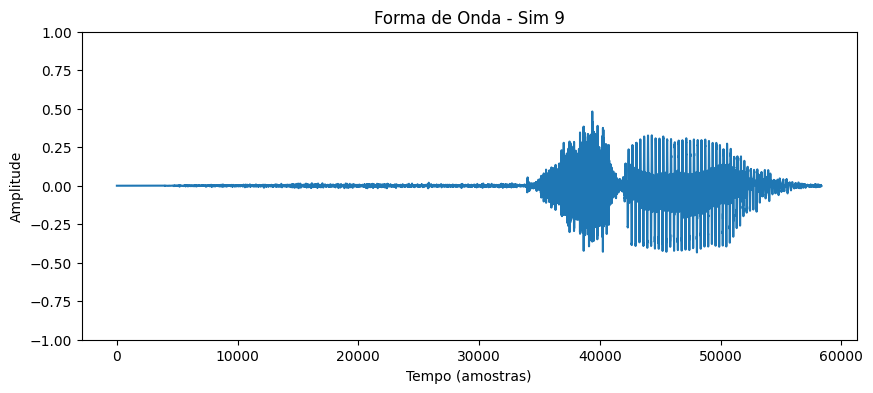

In [12]:
# Iterar sobre as colunas de 'audio_sim'
for coluna in audio_sim.columns:
    audio_data = audio_sim[coluna]  # Obtendo os dados de áudio
    plt.figure(figsize=(10, 4))
    plt.plot(audio_data)
    plt.title(f'Forma de Onda - Sim {coluna}')
    plt.ylim([-1, 1])
    plt.xlabel('Tempo (amostras)')  # Adiciona legenda ao eixo x
    plt.ylabel('Amplitude')  # Adiciona legenda ao eixo y
    plt.show()


##2- Divida cada um destes 10 sinais em 80 blocos de N/80 amostras, em que N é o número de amostras de cada um dos sinais de áudio. Calcule a energia de cada um destes blocos e gere os gráficos com as energias destes 80 blocos no eixo y e o índice do bloco no eixo x, em 2 figuras separadas. Uma figura deve conter os áudios “sim” e a outra deve conter os áudios “não”.

### Gráficos dos áudios antes de dividir em blocos

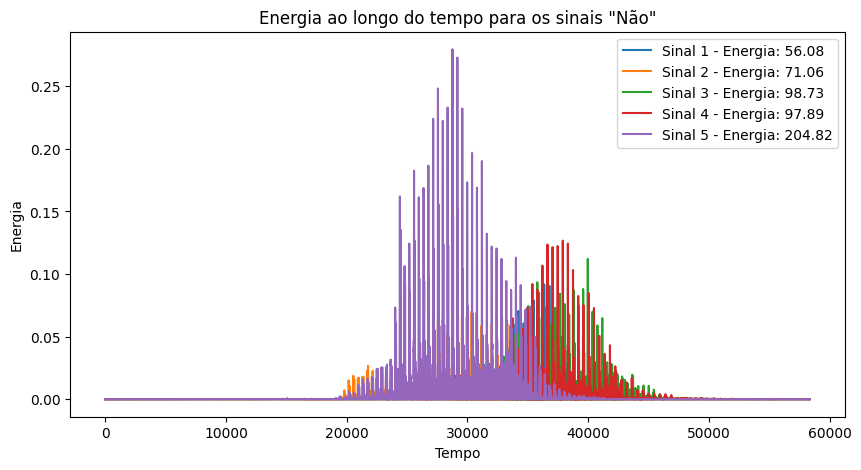

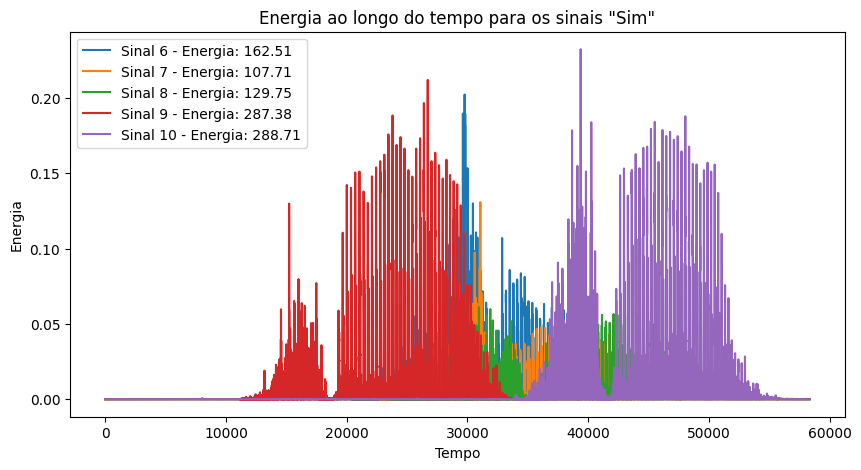

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que df_train seja o seu DataFrame
num_colunas = df_train.shape[1]

# Separando os sinais "não" e "sim"
sinais_nao = df_train.iloc[:, :5]
sinais_sim = df_train.iloc[:, 5:]

# Criando um range de tempo
tempo = range(df_train.shape[0])

# Calculando e plotando a energia para os sinais "não"
plt.figure(figsize=(10, 5))

for i in range(5):
    energia = (sinais_nao.iloc[:, i]**2).sum()
    plt.plot(tempo, sinais_nao.iloc[:, i]**2, label=f'Sinal {i+1} - Energia: {energia:.2f}')

plt.xlabel('Tempo')
plt.ylabel('Energia')
plt.title('Energia ao longo do tempo para os sinais "Não"')
plt.legend()
plt.show()

# Calculando e plotando a energia para os sinais "sim"
plt.figure(figsize=(10, 5))

for i in range(5):
    energia = (sinais_sim.iloc[:, i]**2).sum()
    plt.plot(tempo, sinais_sim.iloc[:, i]**2, label=f'Sinal {i+6} - Energia: {energia:.2f}')

plt.xlabel('Tempo')
plt.ylabel('Energia')
plt.title('Energia ao longo do tempo para os sinais "Sim"')
plt.legend()
plt.show()


###Gráficos dos áudios depois da divisão em blocos

In [14]:
# Criando uma cópia do DataFrame para completar as amostras com 0 para ficar com 58400, que seria divisível por 80.
df_train_copia = df_train.copy()

In [15]:
# Obtendo o número de linhas e colunas
num_linhas, num_colunas = df_train_copia.shape

# Exibindo o número de linhas e colunas
print(f'O DataFrame possui {num_linhas} linhas e {num_colunas} colunas.')

O DataFrame possui 58360 linhas e 10 colunas.


In [16]:
# Adicionando 40 linhas com valores zero em cada coluna
df_zeros = pd.DataFrame(0, index=range(40), columns=df_train_copia.columns)
df_train_copia = pd.concat([df_train_copia, df_zeros])

# Obtendo o número de linhas e colunas
num_linhas, num_colunas = df_train_copia.shape
# Verificando o número de linhas após a adição
print(f'O DataFrame após a adição(data_train_copia): {num_linhas} linhas e {num_colunas} colunas.')

O DataFrame após a adição(data_train_copia): 58400 linhas e 10 colunas.


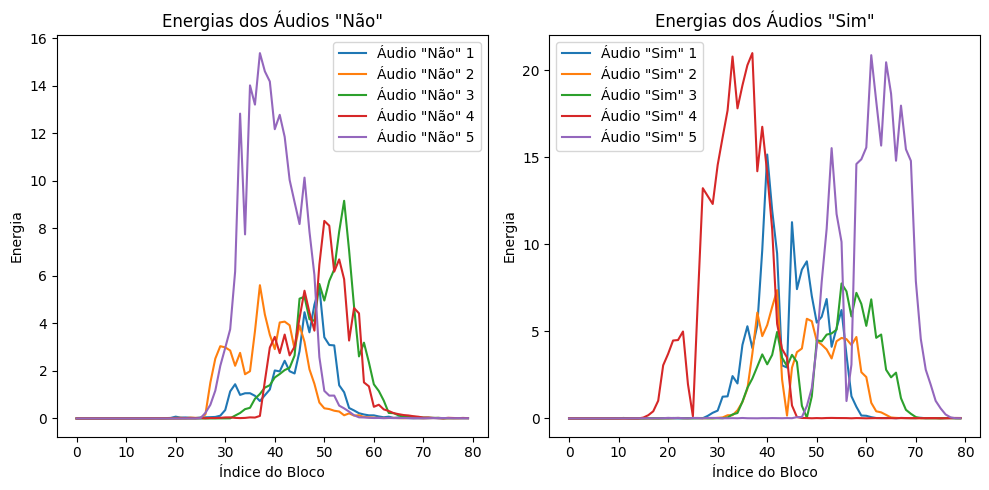

In [17]:
# Calcular N, o número de amostras em cada sinal de áudio
N = df_train_copia.shape[0]  # Supondo que o número de amostras seja igual em todos os sinais

# Calcular N/80
num_blocos = 80
amostras_por_bloco = N // num_blocos

# Dividir cada sinal em 80 blocos e calcular a energia
energias_por_bloco = []

for coluna in df_train_copia.columns:
    sinal = df_train_copia[coluna].values
    blocos = [sinal[i:i+amostras_por_bloco] for i in range(0, N, amostras_por_bloco)]
    energias = [np.sum(bloco**2) for bloco in blocos]
    energias_por_bloco.append(energias)

# Converter para DataFrame
df_energias = pd.DataFrame(energias_por_bloco).T  # 80 linhas (representando os blocos) e 10 colunas (representando os sinais)

# Gerar gráficos
plt.figure(figsize=(10, 5))

# Para os áudios "não"
plt.subplot(1, 2, 1)
for i in range(5):
    plt.plot(df_energias[i],label=f'Áudio "Não" {i+1}')
plt.title('Energias dos Áudios "Não"')
plt.xlabel('Índice do Bloco')
plt.ylabel('Energia')
plt.legend()

# Para os áudios "sim"
plt.subplot(1, 2, 2)
for i in range(5, 10):
    plt.plot(df_energias[i], label=f'Áudio "Sim" {i-4}')
plt.title('Energias dos Áudios "Sim"')
plt.xlabel('Índice do Bloco')
plt.ylabel('Energia')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
print(df_energias.shape)
df_energias.sample(3)

(80, 10)


,0,1,2,3,4,5,6,7,8,9
15,0.008230,0.011339,0.000000,0.000273,0.000000,0.000158,0.001355,0.006573,0.051605,0.008022
5,0.000317,0.000594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000264,0.000000,0.000168
50,3.419442,0.427613,4.964381,8.318863,1.161496,5.505914,4.453690,4.496004,0.022162,4.153120


##3- Calcule o módulo ao quadrado da Transformada de Fourier (TF) dos 10 sinais de áudio de InputDataTrain.m (InputDataTrain.csv) e gere os gráficos destas TFs, em 2 figuras separadas. Uma figura deve conter os áudios “sim” e a outra deve conter os áudios “não”. O eixo x deste gráficos deve corresponder às frequências entre -pi e pi.

<Figure size 1200x600 with 0 Axes>

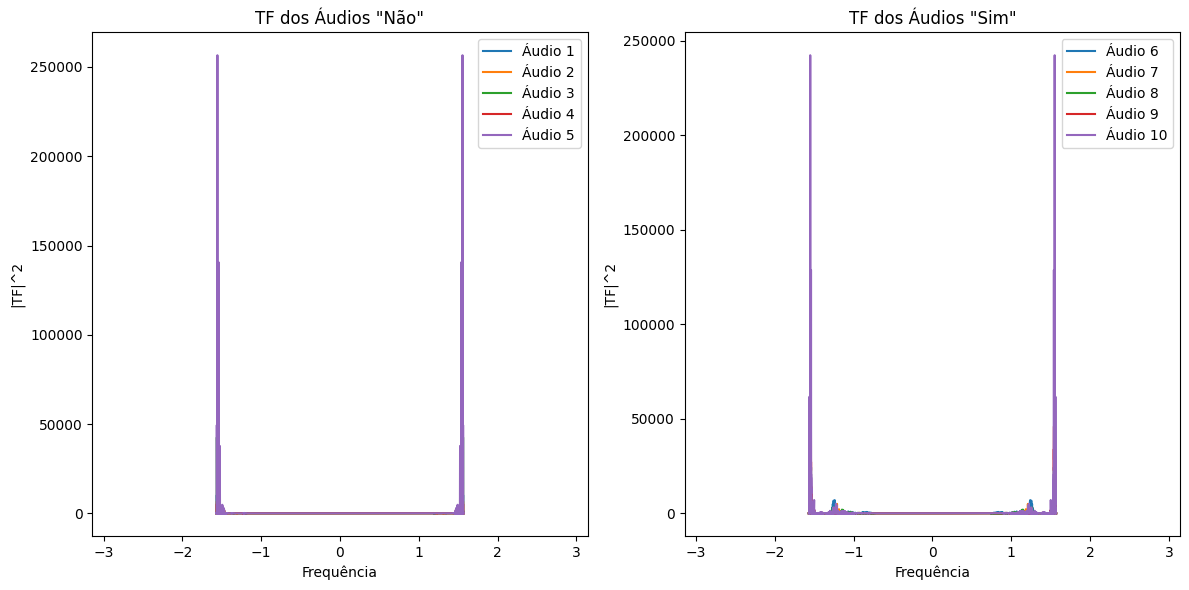

In [19]:
# Número de pontos na TF
N = df_train.shape[0]

# Eixo de frequências entre -pi e pi
freq = np.fft.fftshift(np.fft.fftfreq(N)) * np.pi

# Calcular a Transformada de Fourier
tf = np.fft.fft(df_train, axis=0)

# Calcular o módulo ao quadrado
tf_mod_quad = np.abs(tf)**2

# Separar os sinais "sim" e "não"
tf_nao = tf_mod_quad[:, :5]  # Primeiras 5 colunas correspondem a "não"
tf_sim = tf_mod_quad[:, 5:]  # Últimas 5 colunas correspondem a "sim"

plt.figure(figsize=(12, 6))

# Geração do  gráfico "não"
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('TF dos Áudios "Não"')
plt.xlabel('Frequência')
plt.ylabel('|TF|^2')
for i in range(5):
    plt.plot(freq, tf_nao[:, i], label=f"Áudio {i+1}")
#plt.xlim([-np.pi, np.pi])
plt.xlim([-np.pi,np.pi])
plt.legend()

# Geração do  gráfico "sim"
plt.subplot(1, 2, 2)
plt.title('TF dos Áudios "Sim"')
plt.xlabel('Frequência')
plt.ylabel('|TF|^2')
for i in range(5):
    plt.plot(freq, tf_sim[:, i], label=f"Áudio {i+6}")
plt.xlim([-np.pi, np.pi])
plt.legend()


plt.tight_layout()
plt.show()


##4- Note que o módulo ao quadrado da TF é simétrico em relação à frequência zero. Além disso, pode-se perceber que o espectro dos sinais é concentrado nas baixas frequências. Desta forma, você deve eliminar as redundâncias das TFs calculadas no Item 3 descartando as frequências negativas e as frequências acima de pi/2. Em outras palavras, recalcule estas TFs considerando apenas as frequências entre 0 e pi/2. Gere os gráficos destas TFs, em 2 figuras separadas. Uma figura deve conter os áudios “sim” e a outra deve conter os áudios “não”. O eixo x deste gráficos deve corresponder às frequências entre 0 e pi/2.

58360


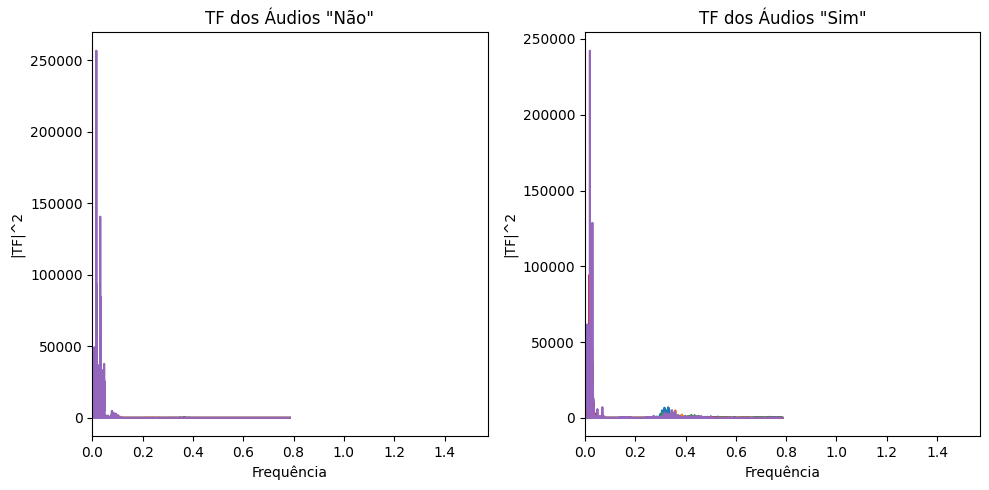

In [20]:
# Recalcular a TF considerando apenas frequências entre 0 e pi/2
N = df_train.shape[0]
print(N)
freq = np.fft.fftfreq(N)[:N//2] * np.pi
tf = np.fft.fft(df_train, axis=0)
tf_mod_quad = np.abs(tf)**2
tf_mod_quad = tf_mod_quad[:N//4, :]

# Separar os sinais "sim" e "não"
tf_nao = tf_mod_quad[:N//4, :5]
tf_sim = tf_mod_quad[:N//4, 5:]

# Geração dos gráficos em duas figuras separadas
plt.figure(figsize=(10, 5))

# Gráfico para os áudios "Não"
plt.subplot(1, 2, 1)
plt.title('TF dos Áudios "Não"')
plt.xlabel('Frequência')
plt.ylabel('|TF|^2')
plt.plot(freq[:N//4], tf_nao)
plt.xlim([0, np.pi/2])

# Gráfico para os áudios "Sim"
plt.subplot(1, 2, 2)
plt.title('TF dos Áudios "Sim"')
plt.xlabel('Frequência')
plt.ylabel('|TF|^2')
plt.plot(freq[:N//4], tf_sim)
plt.xlim([0, np.pi/2])

plt.tight_layout()
plt.show()

# Salvar as TFs em arquivos no formato .npy
np.save('tf_sim.npy', tf_sim)
np.save('tf_nao.npy', tf_nao)

##5-) Divida cada uma das 10 TFs do Item 4 em 80 blocos de N/320 amostras (N/4 é o número de amostras de cada uma das TFs). Calcule a energia de cada um destes blocos e gere os gráficos com as energias de destes 80 blocos no eixo y e o índice do bloco no eixo x, em 2 figuras separadas. Uma figura deve conter os áudios “sim” e a outra deve conter os áudios “não”. Caso N/320 não seja inteiro, ignore as casas decimais de N/320.

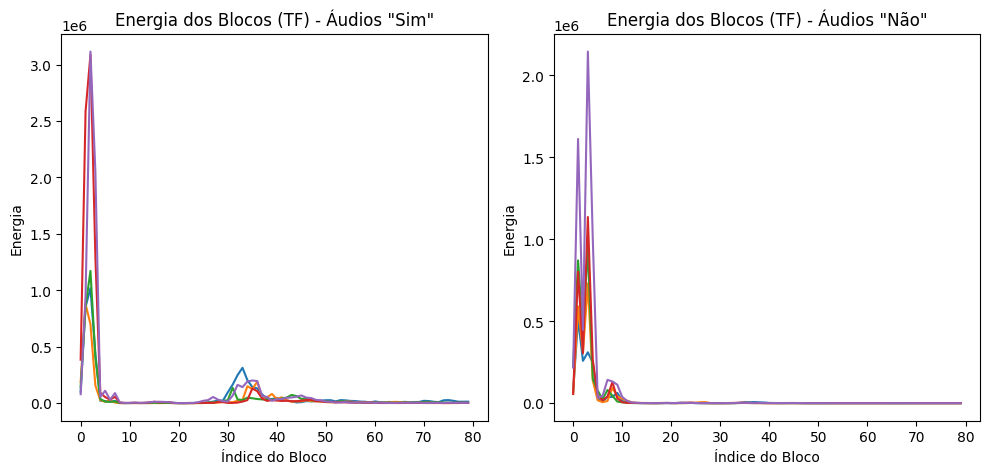

In [22]:
# Carregar as TFs dos arquivos
tf_sim = np.load('tf_sim.npy')
tf_nao = np.load('tf_nao.npy')

# Número de pontos na TF
N = tf_sim.shape[0] #14560

# Dividir cada TF em 80 blocos de 182 amostras
num_blocos = 80
tamanho_bloco = N // num_blocos

# Inicializar arrays para armazenar as energias
energias_sim = np.zeros((num_blocos, 5))  # Para áudios "sim"
energias_nao = np.zeros((num_blocos, 5))  # Para áudios "não"

# Calcular a energia de cada bloco
for i in range(5):  # Para cada áudio
    for j in range(num_blocos):  # Para cada bloco
        bloco_sim = tf_sim[j*tamanho_bloco:(j+1)*tamanho_bloco, i]
        bloco_nao = tf_nao[j*tamanho_bloco:(j+1)*tamanho_bloco, i]

        # Calcular a energia
        energias_sim[j, i] = np.sum(bloco_sim)
        energias_nao[j, i] = np.sum(bloco_nao)

# Geração dos gráficos
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Energia dos Blocos (TF) - Áudios "Sim"')
plt.xlabel('Índice do Bloco')
plt.ylabel('Energia')
plt.plot(energias_sim)

plt.subplot(1, 2, 2)
plt.title('Energia dos Blocos (TF) - Áudios "Não"')
plt.xlabel('Índice do Bloco')
plt.ylabel('Energia')
plt.plot(energias_nao)

plt.tight_layout()
plt.show()


In [23]:
# Transformar os arrays de energias em DataFrames
df_energias_nao = pd.DataFrame(energias_nao, columns=[f"{i}" for i in range(5)])
df_energias_sim = pd.DataFrame(energias_sim, columns=[f"{i+5}" for i in range(5)])

# Unir os DataFrames
df_energias_tf = pd.concat([df_energias_nao, df_energias_sim], axis=1)

# Exibir 3 amostras aleatórias do DataFrame
df_energias_tf.sample(3)

,0,1,2,3,4,5,6,7,8,9
24,1295.544506,1622.090528,1228.925233,2863.946284,1444.395323,2696.072386,629.718799,1405.874325,3010.615619,8319.055810
49,39.751189,17.285219,11.038982,14.436248,85.652414,22267.109241,15689.099882,17157.693960,15712.980144,25405.509265
46,413.299927,51.770650,130.059937,196.688736,641.081227,18365.155750,25273.179991,42531.048320,27782.798503,49296.474922


##6- Agora, divida cada um dos sinais de áudio (no domínio do tempo) em 10 blocos de N/10 amostras e calcule o módulo ao quadrado da TF de cada um destes blocos.Os 10 espectros resultantes de cada áudio correspondem à Transformada de Fourier de tempo curto (short-time Fourier transform – STFT). Tal como no Item 4, recalcule estas STFTs considerando apenas as frequências entre 0 e pi/2. Gere os gráficos destas STFTs, em 2 figuras separadas, mas apenas para um sinal do tipo “sim” e um sinal do tipo “não”. O eixo x deste gráficos deve corresponder às frequências entre 0 e pi/2. Note que, no Itens 3 e 4, você deve calcular a TF do sinal inteiro (com todas as amostras), enquanto nos Itens 5 e 6 você deve calcular a TF dos sub-sinais gerados (cada um com N/10 amostras).

In [24]:
# Defina N como o número de amostras em cada sinal de áudio
N = df_train.shape[0]

# Dividir cada sinal em 10 blocos de N/10 amostras
num_blocos = 10
amostras_por_bloco = N // num_blocos

# Inicializar arrays para armazenar os módulos ao quadrado da TF
tf_mod_quad_sim = np.zeros((num_blocos, 5))  # Para áudios "sim"
tf_mod_quad_nao = np.zeros((num_blocos, 5))  # Para áudios "não"

# Calcular o módulo ao quadrado da TF de cada bloco
for i in range(5):  # Para cada áudio
    sinal_nao = df_train.iloc[:, i].values
    sinal_sim = df_train.iloc[:, i+5].values

    for j in range(num_blocos):  # Para cada bloco
        bloco_nao = sinal_nao[j*amostras_por_bloco:(j+1)*amostras_por_bloco]
        bloco_sim = sinal_sim[j*amostras_por_bloco:(j+1)*amostras_por_bloco]

        tf_bloco_nao = np.fft.fft(bloco_nao)
        tf_mod_quad_nao[j, i] = np.sum(np.abs(tf_bloco_nao)**2)

        tf_bloco_sim = np.fft.fft(bloco_sim)
        tf_mod_quad_sim[j, i] = np.sum(np.abs(tf_bloco_sim)**2)

###Gráfico STFT para dois sinais

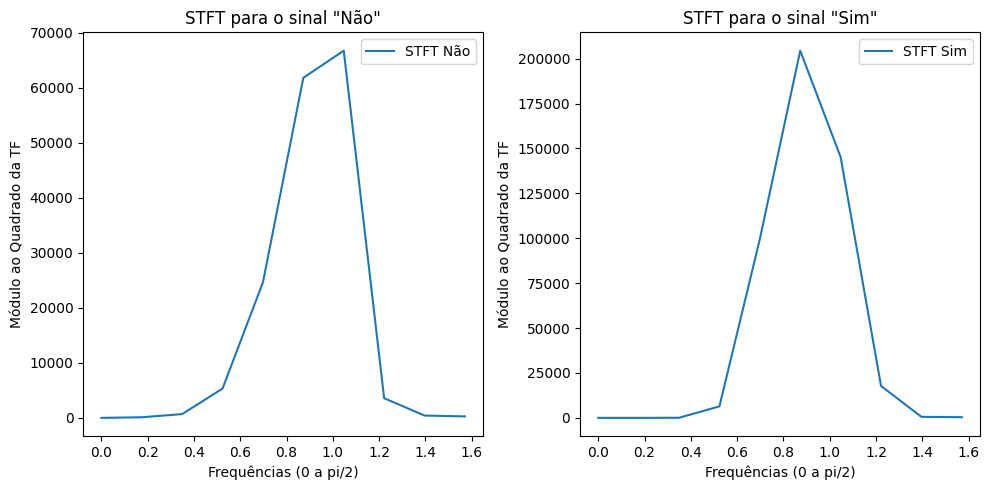

In [25]:
# Recalculando as STFTs considerando apenas as frequências entre 0 e pi/2 e gerando o gráfico para um sinal do tipo não e outro sim
# Supondo que fs seja a frequência de amostragem (número de amostras por segundo)
fs = 1  #valor padrão

# Um sinal do tipo "não"
sinal_nao = df_train.iloc[:, 0].values

# Um sinal do tipo "sim"
sinal_sim = df_train.iloc[:, 5].values

# Dividir cada sinal em 10 blocos
num_blocos = 10
amostras_por_bloco = len(sinal_sim) // num_blocos

# Inicializar arrays para armazenar os módulos ao quadrado da TF
tf_mod_quad_sim = np.zeros(num_blocos)
tf_mod_quad_nao = np.zeros(num_blocos)

# Calcular o módulo ao quadrado da TF para cada bloco
for j in range(num_blocos):
    bloco_sim = sinal_sim[j*amostras_por_bloco:(j+1)*amostras_por_bloco]
    bloco_nao = sinal_nao[j*amostras_por_bloco:(j+1)*amostras_por_bloco]

    tf_bloco_sim = np.fft.fft(bloco_sim)
    tf_mod_quad_sim[j] = np.sum(np.abs(tf_bloco_sim[:len(tf_bloco_sim)//2])**2)

    tf_bloco_nao = np.fft.fft(bloco_nao)
    tf_mod_quad_nao[j] = np.sum(np.abs(tf_bloco_nao[:len(tf_bloco_nao)//2])**2)

# Frequências correspondentes
frequencias = np.linspace(0, np.pi/2, num_blocos)

#plotar os gráficos
plt.figure(figsize=(10, 5))

# Plotar os resultados para o sinal "não"
plt.subplot(1, 2, 1)
plt.plot(frequencias, tf_mod_quad_nao, label='STFT Não')
plt.title('STFT para o sinal "Não"')
plt.xlabel('Frequências (0 a pi/2)')
plt.ylabel('Módulo ao Quadrado da TF')
plt.legend()

# Plotar os resultados para o sinal "sim"
plt.subplot(1, 2, 2)
plt.plot(frequencias, tf_mod_quad_sim, label='STFT Sim')
plt.title('STFT para o sinal "Sim"')
plt.xlabel('Frequências (0 a pi/2)')
plt.ylabel('Módulo ao Quadrado da TF')
plt.legend()

plt.tight_layout()
plt.show()

##7- Divida estas STFTs em 8 blocos de N/320 amostras (N/40 é o número de amostras de uma das STFTs). Calcule a energia de cada um destes blocos. Pra cada sinal de áudio, você deve obter 8 energias para cada uma das 10 STFTs,totalizando 80 energias para cada sinal de áudio. Não precisa gerar nenhum gráfico neste Item 7.

In [35]:
#primeira divisão
# Definindo o número de blocos para dividir cada sinal
num_blocos = 10
tamanho_bloco = N // num_blocos

# Inicializando uma lista para armazenar os resultados
tf_mod_quad_blocos = []

# Dividindo cada sinal de áudio em blocos e calculando o módulo ao quadrado da TF
for i in range(num_blocos):
    bloco = df_train[i*tamanho_bloco : (i+1)*tamanho_bloco]
    tf_bloco = np.fft.fft(bloco, axis=0)
    tf_mod_quad_bloco = np.abs(tf_bloco)**2
    tf_mod_quad_blocos.append(tf_mod_quad_bloco)  # tf_mod_quad_blocos conterá o módulo ao quadrado da TF para cada bloco.

#segunda divisão
# Definindo o número de sub-blocos
num_sub_blocos = 8

# Inicializando listas para armazenar as energias
energias = []
sinais = []
espectros = []
blocos = []

# Para cada bloco
for i in range(num_blocos):
    # Para cada canal de áudio (de 0 a 9)
    for j in range(10):
        # Obtendo o espectro correspondente ao canal j do bloco i
        espectro = tf_mod_quad_blocos[i][:, j]
        # Dividindo o espectro em sub-blocos
        sub_blocos = np.array_split(espectro, num_sub_blocos)

        # Calculando a energia para cada sub-bloco
        for k, sub_bloco in enumerate(sub_blocos):
            energia = np.sum(sub_bloco)
            energias.append(energia)
            # Identificando o sinal (sim ou não)
            sinal = "sim" if j >= 5 else "não"
            sinais.append(sinal)
            # Identificando o espectro e bloco correspondente
            espectros.append(j + 1)
            blocos.append(i + 1)   # As energias, sinais, espectros e blocos agora contêm os resultados desejados.

# Separar as energias de acordo com os sinais
energias_nao_stft = energias[:400]
energias_sim_stft = energias[400:]

# Criar um dicionário com as energias separadas
data = {
    "sinal_1": energias_nao_stft[0:80],
    "sinal_2": energias_nao_stft[80:160],
    "sinal_3": energias_nao_stft[160:240],
    "sinal_4": energias_nao_stft[240:320],
    "sinal_5": energias_nao_stft[320:400],
    "sinal_6": energias_sim_stft[0:80],
    "sinal_7": energias_sim_stft[80:160],
    "sinal_8": energias_sim_stft[160:240],
    "sinal_9": energias_sim_stft[240:320],
    "sinal_10": energias_sim_stft[320:400]
}

# Criar um DataFrame a partir do dicionário
df_energias_stft = pd.DataFrame(data)
len(energias)

800

In [36]:
a = df_energias.shape
b = df_energias_tf.shape
c = df_energias_stft.shape
print(a,b,c)

(80, 10) (80, 10) (80, 10)


### Calculando os centróides

In [37]:
#Domínio do tempo
# Dividindo as colunas em duas partes (não e sim)
colunas_nao_tempo = df_energias.iloc[:, :5]
colunas_sim_tempo = df_energias.iloc[:, 5:]

# Calculando a média das energias para a classe "não" e "sim"
media_energias_nao_tempo = colunas_nao_tempo.mean(axis=1)
media_energias_sim_tempo = colunas_sim_tempo.mean(axis=1)


#Domínio da TF
# Dividindo as colunas em duas partes (não e sim)
colunas_nao_tf = df_energias_tf.iloc[:, :5]
colunas_sim_tf = df_energias_tf.iloc[:, 5:]

# Calculando a média das energias para a classe "não" e "sim"
media_energias_nao_tf = colunas_nao_tf.mean(axis=1)
media_energias_sim_tf = colunas_sim_tf.mean(axis=1)


#Domínio da stftf
# Dividindo as colunas em duas partes (não e sim)
colunas_nao_stft = df_energias_stft.iloc[:, :5]
colunas_sim_stft = df_energias_stft.iloc[:, 5:]

# Calculando a média das energias para a classe "não" e "sim"
media_energias_nao_stft = colunas_nao_stft.mean(axis=1)
media_energias_sim_stft = colunas_sim_stft.mean(axis=1)

##9- Repita os procedimentos do Itens 1 a 7 para calcular os vetores de tamanho 80x1 com as energias, só que desta vez usando os 7 sinais de teste do arquivo InputDataTest.m e sem gerar nenhum gráfico. Ou seja, apenas gere, para um dos 3 domínios, os 7 vetores de tamanho 80x1 com energias dos blocos. Não precisa gerar nenhum gráfico neste Item 9.

In [38]:
#Passo 01
#separando os áudios "sim" e "não"
audio_nao_test = df_test.iloc[:,:3]
audio_sim_test = df_test.iloc[:,4:]



#Passo 02
# Criando uma cópia do DataFrame para completar as amostras com 0 para ficar com 58400, que seria divisível por 80.
df_test_copia = df_test.copy()

# Adicionando 40 linhas com valores zero em cada coluna
df_zeros_test = pd.DataFrame(0, index=range(40), columns=df_test_copia.columns)
df_test_copia = pd.concat([df_test_copia, df_zeros_test])

# Obtendo o número de linhas e colunas após a adição dos 0s
df_test_copia.shape

# Calcular N, o número de amostras em cada sinal de áudio
N_test = df_test_copia.shape[0]  # Supondo que o número de amostras seja igual em todos os sinais

# Calcular N/80
num_blocos_test = 80
amostras_por_bloco_test = N_test // num_blocos_test

# Dividir cada sinal em 80 blocos e calcular a energia
energias_por_bloco_test = []

for coluna in df_test_copia.columns:
    sinal_test = df_test_copia[coluna].values
    blocos_test = [sinal_test[i:i+amostras_por_bloco_test] for i in range(0, N_test, amostras_por_bloco_test)]
    energias_test = [np.sum(bloco**2) for bloco in blocos_test]
    energias_por_bloco_test.append(energias_test)

# Converter para DataFrame
df_energias_test = pd.DataFrame(energias_por_bloco_test).T  # 80 linhas (representando os blocos) e 7 colunas (representando os sinais)



#Passo 03
# Número de pontos na TF
N_test = df_test.shape[0]

# Eixo de frequências entre -pi e pi
freq = np.fft.fftshift(np.fft.fftfreq(N)) * np.pi

# Calcular a Transformada de Fourier
tf_test = np.fft.fft(df_test, axis=0)

# Calcular o módulo ao quadrado
tf_mod_quad_test = np.abs(tf_test)**2

# Separar os sinais "sim" e "não"
tf_nao_test = tf_mod_quad_test[:, :3]  # Primeiras 5 colunas correspondem a "não"
tf_sim_test = tf_mod_quad_test[:, 4:]  # Últimas 5 colunas correspondem a "sim"


#Passo 04
# Recalcular a TF considerando apenas frequências entre 0 e pi/2
N_test = df_test.shape[0]
freq_test = np.fft.fftfreq(N)[:N//2] * np.pi
tf_test = np.fft.fft(df_test, axis=0)
tf_mod_quad_test = np.abs(tf_test)**2
tf_mod_quad_test = tf_mod_quad_test[:N//8, :]

# Separar os sinais "sim" e "não"
tf_nao_test = tf_mod_quad_test[:N//4, :3]
tf_sim_test = tf_mod_quad_test[:N//4, 4:]

# Salvar as TFs em arquivos no formato .npy
np.save('tf_sim_test.npy', tf_sim)
np.save('tf_nao_test.npy', tf_nao)




#Passo 05
# Carregar as TFs dos arquivos
tf_sim_test = np.load('tf_sim_test.npy')
tf_nao_test = np.load('tf_nao_test.npy')

# Número de pontos na TF
N_test = tf_sim_test.shape[0]

# Dividir cada TF em 80 blocos de 182 amostras
num_blocos_test = 80
tamanho_bloco_test = N_test // num_blocos_test

# Inicializar arrays para armazenar as energias
energias_nao_test = np.zeros((num_blocos_test, 3))  # Para áudios "não"
energias_sim_test = np.zeros((num_blocos_test, 4))  # Para áudios "sim"

# Calcular a energia de cada bloco
for i in range(3):  # Para cada áudio "não"
    for j in range(num_blocos_test):  # Para cada bloco
        bloco_nao_test = tf_nao[j*tamanho_bloco_test:(j+1)*tamanho_bloco_test, i]

        # Calcular a energia
        energias_nao_test[j, i] = np.sum(bloco_nao_test)

for i in range(4):  # Para cada áudio "sim"
    for j in range(num_blocos_test):  # Para cada bloco
        bloco_sim_test = tf_sim[j*tamanho_bloco_test:(j+1)*tamanho_bloco_test, i]

        # Calcular a energia
        energias_sim_test[j, i] = np.sum(bloco_sim_test)

# Criar um DataFrame com as energias das TFs
df_energias_ft_test = pd.DataFrame(np.hstack((energias_nao_test, energias_sim_test)), columns=['0', '1', '2', '3', '4', '5', '6'])



#Passo 06 e 07
# Definindo o número de blocos para dividir cada sinal
num_blocos = 10
tamanho_bloco = N // num_blocos

# Inicializando uma lista para armazenar os resultados
tf_mod_quad_blocos = []

# Dividindo cada sinal de áudio em blocos e calculando o módulo ao quadrado da TF
for i in range(num_blocos):
    bloco = df_test[i*tamanho_bloco : (i+1)*tamanho_bloco]
    tf_bloco = np.fft.fft(bloco, axis=0)
    tf_mod_quad_bloco = np.abs(tf_bloco)**2
    tf_mod_quad_blocos.append(tf_mod_quad_bloco)  # tf_mod_quad_blocos conterá o módulo ao quadrado da TF para cada bloco.

# Definindo o número de sub-blocos
num_sub_blocos = 8

# Inicializando listas para armazenar as energias
energias_stft_test = []
sinais_test = []
espectros_test = []
blocos_test = []

# Para cada bloco
for i in range(num_blocos):
    # Para cada canal de áudio (de 0 a 7)
    for j in range(7):
        # Obtendo o espectro correspondente ao canal j do bloco i
        espectro_test = tf_mod_quad_blocos[i][:, j]
        # Dividindo o espectro em sub-blocos
        sub_blocos = np.array_split(espectro_test, num_sub_blocos)

        # Calculando a energia para cada sub-bloco
        for k, sub_bloco in enumerate(sub_blocos):
            energia_test = np.sum(sub_bloco)
            energias_stft_test.append(energia_test)
            # Identificando o sinal (sim ou não)
            sinal_test = "sim" if j >= 3 else "não"
            sinais_test.append(sinal)
            # Identificando o espectro e bloco correspondente
            espectros_test.append(j + 1)
            blocos_test.append(i + 1)   # As energias, sinais, espectros e blocos agora contêm os resultados desejados.

# Separar as energias de acordo com os sinais
energias_nao_stft_test = energias_stft_test[:240]
energias_sim_stft_test = energias_stft_test[240:]

# Criar um dicionário com as energias separadas
data = {
    "sinal_1": energias_nao_stft_test[0:80],
    "sinal_2": energias_nao_stft_test[80:160],
    "sinal_3": energias_nao_stft_test[160:240],
    "sinal_4": energias_sim_stft_test[0:80],
    "sinal_5": energias_sim_stft_test[80:160],
    "sinal_6": energias_sim_stft_test[160:240],
    "sinal_7": energias_sim_stft_test[240:320],
}

# Crie o DataFrame
df_energias_stft_test = pd.DataFrame(data)

In [30]:
a = df_energias_test.shape
b = df_energias_ft_test.shape
c = df_energias_stft_test.shape
print(a, b, c)

(80, 7) (80, 7) (80, 7)


In [39]:
# Acessando os valores das colunas como vetores
vetor_coluna0_tempo = df_energias_test.iloc[:, 0]
vetor_coluna1_tempo = df_energias_test.iloc[:, 1]
vetor_coluna2_tempo = df_energias_test.iloc[:, 2]
vetor_coluna3_tempo = df_energias_test.iloc[:, 3]
vetor_coluna4_tempo = df_energias_test.iloc[:, 4]
vetor_coluna5_tempo = df_energias_test.iloc[:, 5]
vetor_coluna6_tempo = df_energias_test.iloc[:, 6]

# Acessando os valores das colunas como vetores
vetor_coluna0 = df_energias_ft_test.iloc[:, 0]
vetor_coluna1 = df_energias_ft_test.iloc[:, 1]
vetor_coluna2 = df_energias_ft_test.iloc[:, 2]
vetor_coluna3 = df_energias_ft_test.iloc[:, 3]
vetor_coluna4 = df_energias_ft_test.iloc[:, 4]
vetor_coluna5 = df_energias_ft_test.iloc[:, 5]
vetor_coluna6 = df_energias_ft_test.iloc[:, 6]

# Acessando os valores das colunas como vetores
vetor_stft_coluna0 = df_energias_stft_test.iloc[:, 0]
vetor_stft_coluna1 = df_energias_stft_test.iloc[:, 1]
vetor_stft_coluna2 = df_energias_stft_test.iloc[:, 2]
vetor_stft_coluna3 = df_energias_stft_test.iloc[:, 3]
vetor_stft_coluna4 = df_energias_stft_test.iloc[:, 4]
vetor_stft_coluna5 = df_energias_stft_test.iloc[:, 5]
vetor_stft_coluna6 = df_energias_stft_test.iloc[:, 6]

##10- Para realizar a detecção dos comandos de voz (classificação), usaremos o chamado Algoritmo do Centroide, que compara os vetores de energia dos áudios de teste gerados no Item 9 com os centroides que caracterizam cada classe, gerados no Item 8. Desta forma, calcule a distância Euclidiana entre cada um dos 7 vetores gerados no Item 9 e os 2 centroides gerados no Item 8, totalizando 14 distâncias Euclidianas.

###Classificação Tempo

In [40]:
# Vetores gerados no Item 9
vetores_gerados = [vetor_coluna0_tempo, vetor_coluna1_tempo, vetor_coluna2_tempo, vetor_coluna3_tempo, vetor_coluna4_tempo, vetor_coluna5_tempo, vetor_coluna6_tempo]
classe_real = ["não", "não", "não", "sim", "sim", "sim", "sim"]

# Centroides gerados no Item 8
# Por exemplo, se você tem centroides para "sim" e "não" para o domínio do tempo:
centroide_nao_tempo = media_energias_nao_tempo
centroide_sim_tempo = media_energias_sim_tempo

# Inicializa uma lista para armazenar as distâncias Euclidianas
distancias_tempo = []

# Calcula as distâncias Euclidianas
for vetor in vetores_gerados:
    distancia_nao = np.linalg.norm(vetor - centroide_nao_tempo)
    distancia_sim = np.linalg.norm(vetor - centroide_sim_tempo)
    distancias_tempo.append((distancia_nao,distancia_sim))

# Inicialize uma variável para contar os acertos
acertos = 0
# Comparar e escolher a classe
for distancia_nao, distancia_sim in distancias_tempo:   #distância até a centroide_sim_tempo é menor do que a distância até a centroide_nao_tempo
    if distancia_sim < distancia_nao:                   # Se isso for verdadeiro, significa que o vetor teste está mais próximo da centroide_sim_tempo
      # O vetor está mais próximo do centroide "sim"
      classe_escolhida = "sim"
    else:
    # O vetor está mais próximo do centroide "não"
      classe_escolhida = "não"

    # Agora, você tem a classe escolhida. Compare com a classe real do vetor de teste.

    if classe_escolhida == classe_real[distancias_tempo.index((distancia_nao, distancia_sim))]:
        acertos += 1

    print(f"Classe Esperada: {classe_real[distancias_tempo.index((distancia_nao, distancia_sim))]}, Classe Escolhida: {classe_escolhida}")

# Ao final do loop, você terá a quantidade de acertos
print(f"Quantidade de acertos: {acertos}")

Classe Esperada: não, Classe Escolhida: sim
Classe Esperada: não, Classe Escolhida: sim
Classe Esperada: não, Classe Escolhida: sim
Classe Esperada: sim, Classe Escolhida: não
Classe Esperada: sim, Classe Escolhida: não
Classe Esperada: sim, Classe Escolhida: sim
Classe Esperada: sim, Classe Escolhida: sim
Quantidade de acertos: 2


###Classificação FT

In [41]:
# Vetores gerados no Item 9
vetores_gerados = [vetor_coluna0, vetor_coluna1, vetor_coluna2, vetor_coluna3, vetor_coluna4, vetor_coluna5, vetor_coluna6]
# Centroides gerados no Item 8
# Por exemplo, se você tem centroides para "sim" e "não" para o domínio do tempo:
centroide_nao_tf = media_energias_nao_tf
centroide_sim_tf = media_energias_sim_tf

# Inicializa uma lista para armazenar as distâncias Euclidianas
distancias = []

# Calcula as distâncias Euclidianas
for vetor in vetores_gerados:
    distancia_nao = np.linalg.norm(vetor - centroide_nao_tf)
    distancia_sim = np.linalg.norm(vetor - centroide_sim_tf)
    distancias.append((distancia_nao,distancia_sim))

# Inicialize uma variável para contar os acertos
acertos = 0
# Comparar e escolher a classe
for distancia_nao, distancia_sim in distancias:
    if distancia_sim < distancia_nao:
        # O vetor está mais próximo do centroide "sim"
        classe_escolhida = "sim"
    else:
        # O vetor está mais próximo do centroide "não"
        classe_escolhida = "não"

    # Agora, você tem a classe escolhida. Compare com a classe real do vetor de teste.

    if classe_escolhida == classe_real[distancias.index((distancia_nao, distancia_sim))]:
        acertos += 1

    print(f"Classe Esperada: {classe_real[distancias.index((distancia_nao, distancia_sim))]}, Classe Escolhida: {classe_escolhida}")

# Ao final do loop, você terá a quantidade de acertos
print(f"Quantidade de acertos: {acertos}")

Classe Esperada: não, Classe Escolhida: não
Classe Esperada: não, Classe Escolhida: não
Classe Esperada: não, Classe Escolhida: não
Classe Esperada: sim, Classe Escolhida: sim
Classe Esperada: sim, Classe Escolhida: não
Classe Esperada: sim, Classe Escolhida: sim
Classe Esperada: sim, Classe Escolhida: sim
Quantidade de acertos: 6


###Classificação STFT

In [42]:
# Vetores gerados no Item 9
vetores_gerados = [vetor_stft_coluna0, vetor_stft_coluna1, vetor_stft_coluna2,vetor_stft_coluna3,vetor_stft_coluna4,vetor_stft_coluna5,vetor_stft_coluna6]
# Centroides gerados no Item 8
# Por exemplo, se você tem centroides para "sim" e "não" para o domínio do tempo:
centroide_nao_stft = media_energias_nao_stft
centroide_sim_stft = media_energias_sim_stft

# Inicializa uma lista para armazenar as distâncias Euclidianas
distancias_stft = []

# Calcula as distâncias Euclidianas
for vetor_stft in vetores_gerados:
    distancia_nao_stft = np.linalg.norm(vetor_stft - centroide_nao_stft)
    distancia_sim_stft = np.linalg.norm(vetor_stft - centroide_sim_stft)
    distancias_stft.append(( distancia_nao_stft, distancia_sim_stft))


# Inicialize uma variável para contar os acertos
acertos = 0

# Comparar e escolher a classe
for distancia_nao_stft, distancia_sim_stft in distancias_stft:
    if distancia_sim_stft < distancia_nao_stft:
        # O vetor está mais próximo do centroide "sim"
        classe_escolhida = "sim"
    else:
        # O vetor está mais próximo do centroide "não"
        classe_escolhida = "não"

    # Agora, você tem a classe escolhida. Compare com a classe real do vetor de teste.

    if classe_escolhida == classe_real[distancias_stft.index((distancia_nao_stft, distancia_sim_stft))]:
        acertos += 1

    print(f"Classe Esperada: {classe_real[distancias_stft.index((distancia_nao_stft, distancia_sim_stft))]}, Classe Escolhida: {classe_escolhida}")

# Ao final do loop, você terá a quantidade de acertos
print(f"Quantidade de acertos: {acertos}")

Classe Esperada: não, Classe Escolhida: não
Classe Esperada: não, Classe Escolhida: não
Classe Esperada: não, Classe Escolhida: sim
Classe Esperada: sim, Classe Escolhida: não
Classe Esperada: sim, Classe Escolhida: sim
Classe Esperada: sim, Classe Escolhida: sim
Classe Esperada: sim, Classe Escolhida: não
Quantidade de acertos: 4


##Conclusão


  Para esse caso específico de classificação, onde o objetivo é o reconhecimento de voz, considerando as características espectrais e temporais dos sinais, podemos notar que a informação sobre a variação temporal teve uma menor relevância para a tarefa de classificação em comparação com a informação espectral.

  No caso do domínio da Transformada de Fourier (TF), que se concentra exclusivamente nas características espectrais, acabou tendo o melhor desempenho para representar as informações mais importantes necessárias para a classificação.

  Já no domínio da Transformada de Fourier de Tempo Curto (STFT), que possui informações temporais e espectrais, a informação temporal gera uma representação redundante dos dados, já que cada ponto no espectrograma contém informações sobre uma pequena janela temporal, isso pode resultar em informações excessivas, por isso possivelmente obteve o segundo melhor desempenho.

  E por fim o domínio do tempo, considerando os fatores citados, teve o pior  desempenho.